In [1]:
# Import the necessary libraries, packages, and modules.
# Data analysis:

import numpy as np
import pandas as pd
import sklearn
import statsmodels.api as sm 

# DateTime:

import datetime
import time

# Visualisation:

import matplotlib.pyplot as plt
import seaborn as sns

# Import data from the web with 'pandas_datareader'.

from pandas_datareader import data as web
import yfinance as yf  
yf.pdr_override()

# Machine Learning, predictive modelling:

import imblearn
from imblearn.over_sampling import SMOTE  

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import classification_report  

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.utils.validation import column_or_1d

import statsmodels.api as sm   
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ignore warnings:

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the data

cancer = pd.read_csv('LSE_DA301_Module_2_files/LSE_DA301_Module_2_files/Data/breast_cancer_data.csv', index_col='id')
cancer

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN


In [3]:
# Data sense-checking

print(cancer.describe())
print(cancer.info())

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [4]:
# Checking for NA and duplicate data

print(cancer.isnull().sum())
print(cancer.duplicated().sum())

# Column: Unnamed: 32 needs further investigation

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [5]:
# Reviewing Unnamed: 32

print(cancer['Unnamed: 32'].unique())

# Only NAN values, column can be dropped

cancer = cancer.drop(columns='Unnamed: 32')
print(cancer.columns)

# Column dropped

[nan]
Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [6]:
# Determine if data set is balanced.
cancer['diagnosis'].value_counts()

# Data is unbalanced, but decision trees are forgiving regarding balance.
# We keep continuing with the data provided and try another approach at a later stage

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
# Defining the variables

y = cancer['diagnosis']
X = cancer.drop(columns='diagnosis')

X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [8]:
# Fitting the model
# Create testing data

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

# Create classifier

clf=DecisionTreeClassifier(random_state=42)

# Fit the training data

clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
# Predict using the training data

y_train_predicted=clf.predict(X_train)

# Predict using the test data

y_test_predicted=clf.predict(X_test)

# Print accuracy values

print(accuracy_score(y_train,y_train_predicted)) # prediction is the same as the observation
print(accuracy_score(y_test,y_test_predicted)) # prediction on 'unseen data'


1.0
0.9415204678362573


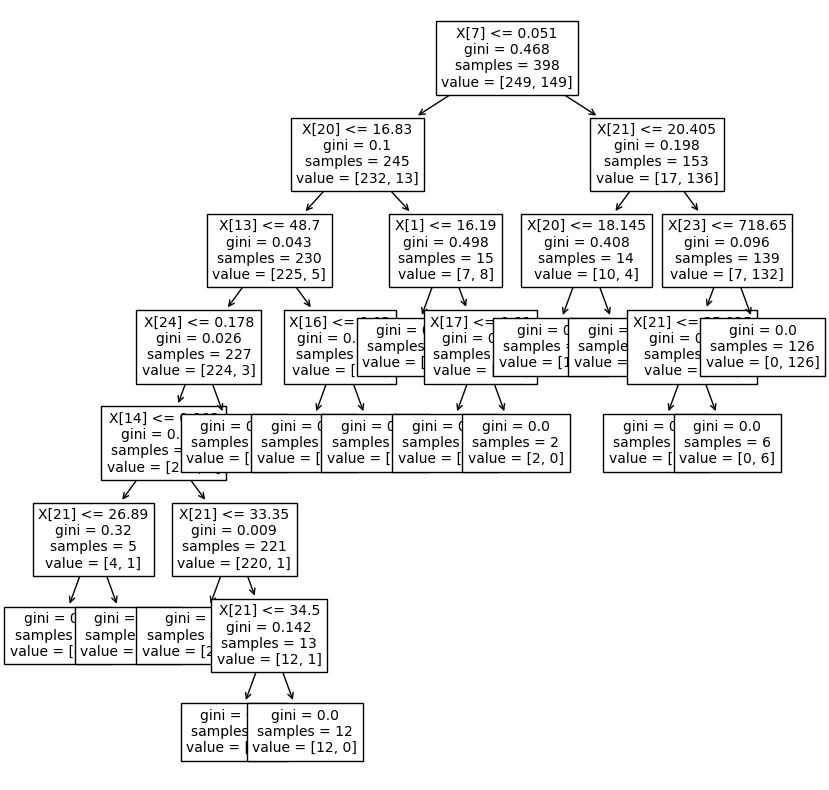

In [10]:
# Plot the decision tree to create the visualisation:

fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clf, fontsize=10)

# Print the plot with plt.show()

plt.show()

In [11]:
# Pruning the model using (pre-)pruning using supplied parameters

clfp = DecisionTreeClassifier(criterion = 'gini',
                             max_depth = 5,
                             min_samples_leaf = 5,
                             min_samples_split = 5)

clfp.fit(X_train,y_train)

y_predicted=clfp.predict(X_test)

accuracy_score(y_test,y_predicted)


0.9707602339181286

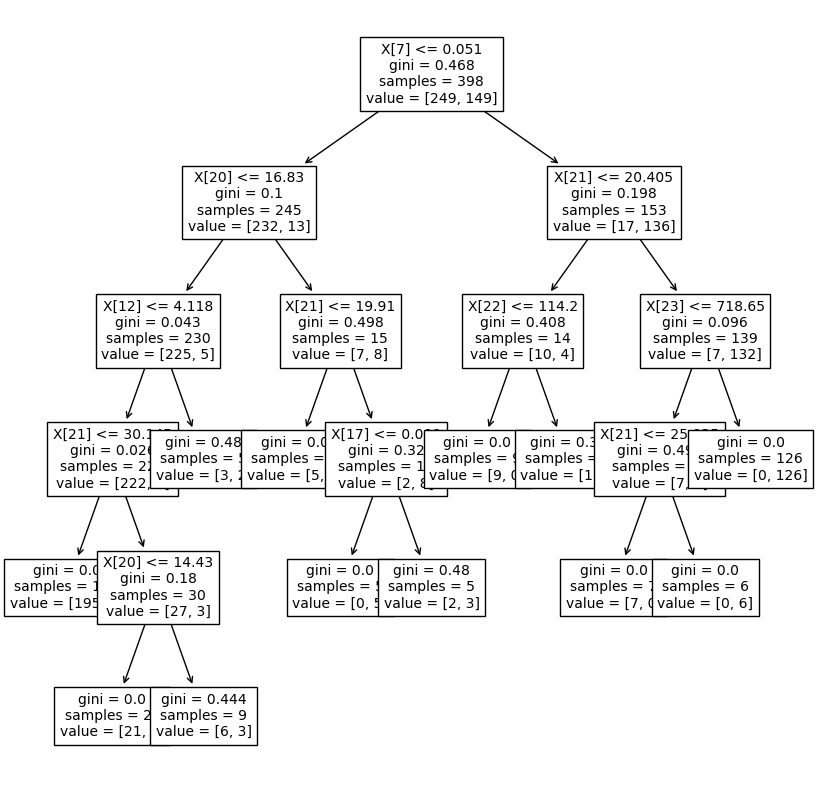

In [12]:
# Plot the pruned tree

# Plot the decision tree to create the visualisation:

fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clfp, fontsize=10)

# Print the plot with plt.show()

plt.show() 

In [13]:
# Indicate the confusion matrix needs to be created

confusion_matrix = confusion_matrix(y_test, y_predicted)
confusion = pd.DataFrame(confusion_matrix, index=['is_healthy', 'is_cancer'],
                         columns=['predicted_healthy', 'predicted_cancer'])

# View the output.

confusion

,predicted_healthy,predicted_cancer
is_healthy,105,3
is_cancer,2,61


<AxesSubplot:>

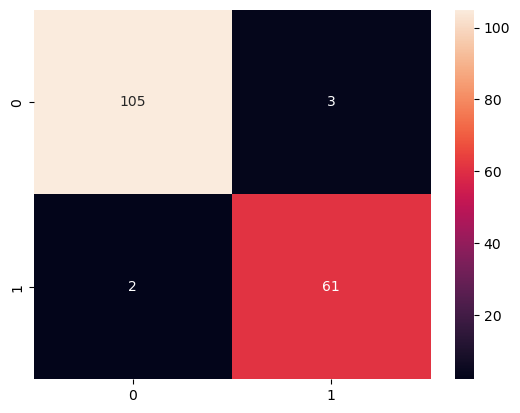

In [14]:
# Plot the confusion_matrix. #NOTE: Color scheme misleading as we are not plotting %'s

sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [15]:
# Print the accuracy and classification report.0

print(metrics.accuracy_score(y_test, y_predicted))
print(classification_report(y_test, y_predicted))


0.9707602339181286
              precision    recall  f1-score   support

           B       0.98      0.97      0.98       108
           M       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



### Compared to the BLR model, we received a highly improved accuracy of 97%, which is an expectable result, as the decision tree model consideres all of the Xs

In [16]:
# Use all the available data for our final model

X = cancer.drop('diagnosis', axis = 1)
y = cancer['diagnosis']

# Create a Decision Tree classifer object

clff = DecisionTreeClassifier(criterion = 'gini',
                             max_depth = 5,
                             min_samples_leaf = 5,
                             min_samples_split = 5)

# Train the Decision Tree Classifer

clff = clff.fit(X, y)

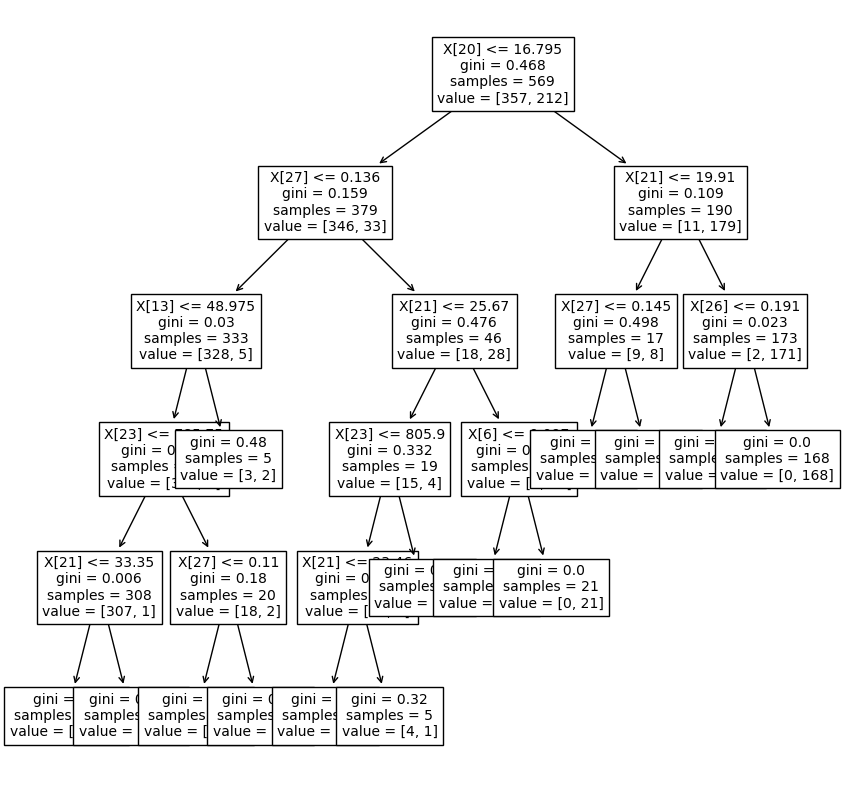

In [17]:
# Plot final model

# Plot the decision tree to create the visualisation:

fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clff, fontsize=10)

# Print the plot with plt.show()

plt.show() 